<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/1er_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px
from itertools import combinations

In [4]:
#leemos el fichero de renfe
df_bmw1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1stEntregable/bmw_pricing_v3.csv",sep=",")
df_bmw1.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# **FECHAS**

In [5]:
#convertimos las fechas
for i in ["fecha_registro","fecha_venta"]:
    df_bmw1[i]=pd.to_datetime(df_bmw1[i])

# **DUPLICADOS**

In [6]:
#verificamos duplicados
df_bmw1[df_bmw1.duplicated(keep='first')]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


# **NEGATIVOS**

In [7]:
#miramos que no hayan precios negativos o 0
df_bmw1[(df_bmw1['precio'] < 0)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [8]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [9]:
#miramos los valores que tenemos en la marca
df_bmw1['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [10]:
#como la lista es de BMW, todos los coches suponemos que son BMW, borramos la columna
del df_bmw1['marca']

In [11]:
#miramos cuantos registros tiene nuestro dataset
len(df_bmw1)

4843

# **OUTLAYERS**

modelo 
 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64 

tipo_coche 
 estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64 

volante_regulable 
 True     2662
False    2177
Name: volante_regul

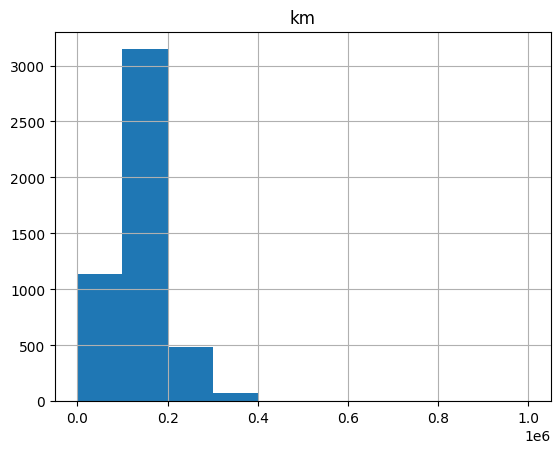

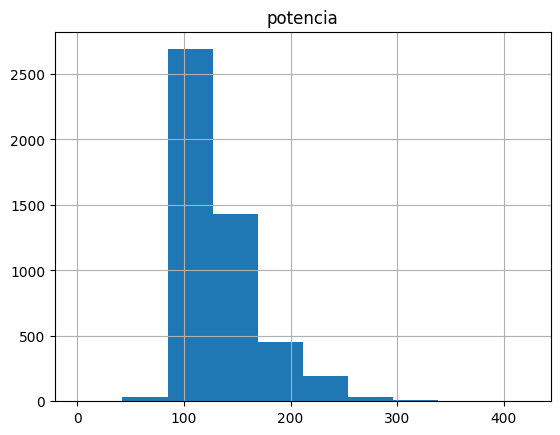

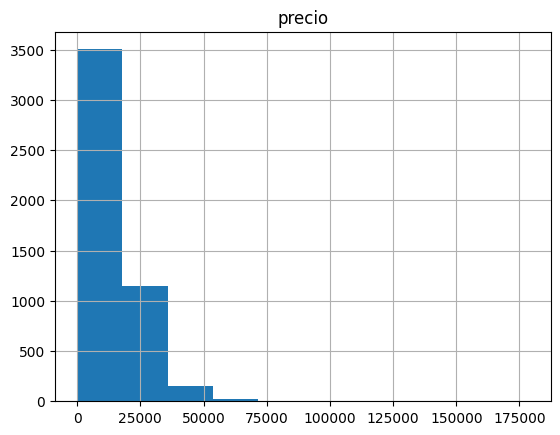

In [12]:
#HACEMOS HISTOGRAMAS PARA DETECTAR POSIBLES OUTLAYERS
for i in df_bmw1:
  if df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')
  elif (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))

OUTLAYERS **NUMERICOS**

In [13]:
#miramos cuantos coches hay más altos de 70000 de precio
df_bmw1[df_bmw1['precio'] > 70000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
2938,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,NaN,False,NaN,False,False,False,True,73100.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [14]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['precio'] <= 70000]

<Axes: >

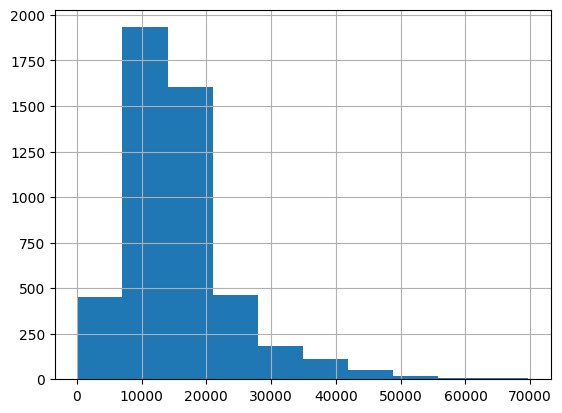

In [15]:
#verificamos histograma
df_bmw1['precio'].hist()

In [16]:
#miramos cuantos coches hay más altos de 300 CV
df_bmw1[df_bmw1['potencia'] > 300]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
67,M3,29925.0,309.0,NaT,petrol,silver,NaN,True,True,False,NaN,True,True,True,True,47000.0,2018-04-01
72,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,NaN,False,True,True,True,53600.0,2018-03-01
73,M3,170550.0,309.0,NaT,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,28000.0,2018-03-01
93,M3,99283.0,309.0,NaT,petrol,silver,NaN,False,False,False,NaN,True,False,True,True,28600.0,2018-04-01
139,M3,169970.0,309.0,2011-03-01,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,35700.0,2018-08-01
2944,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,NaN,False,True,True,True,51200.0,2018-04-01
3092,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,NaN,False,True,True,True,52400.0,2018-05-01
3601,M5,150187.0,412.0,NaT,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01


In [17]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['potencia'] < 300]

<Axes: >

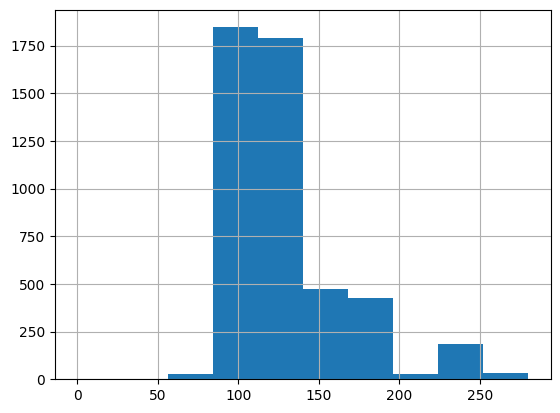

In [18]:
#verificamos histograma
df_bmw1['potencia'].hist()

In [19]:
#miramos cuantos coches hay más altos de 400000 km
df_bmw1[df_bmw1['km'] > 400000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,NaN,False,NaN,True,False,8300.0,2018-03-01
1573,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,NaN,False,False,True,False,1800.0,2018-07-01
2350,318,477571.0,85.0,NaT,diesel,grey,NaN,False,True,False,NaN,False,True,False,False,1200.0,2018-07-01
2829,525,439060.0,105.0,NaT,diesel,silver,NaN,False,False,True,NaN,False,False,True,False,100.0,2018-03-01
3198,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,NaN,False,NaN,True,False,500.0,2018-05-01
3732,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,1400.0,2018-06-01


In [20]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['km'] < 400000]

<Axes: >

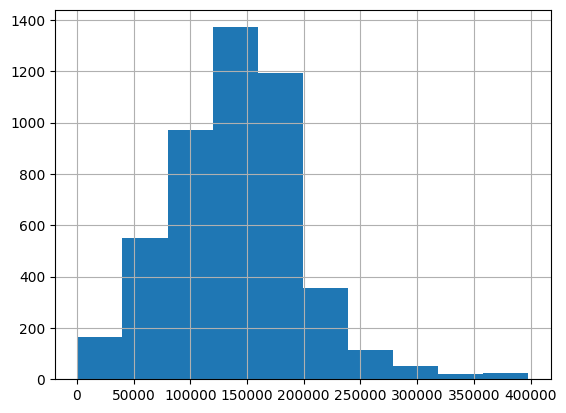

In [21]:
#verificamos histograma
df_bmw1['km'].hist()

**OUTLAYERS** CATEGORICOS

In [22]:
#la función hace lo siguiente, crea una lista vacía, hace un conteo de los valores del dataset, se hace un reset index para que se vuelva un dataset
#luego se recorre el data set y se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral, en caso sea así se agrega en una lista
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []
  tabla=dataset[columna].value_counts().reset_index()
  for i in range(len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [23]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [24]:
df_bmw2 = df_bmw1.copy()

In [25]:
lista_eliminar_modelo = obten_lista_eliminar(df_bmw2, "modelo", 10)

In [26]:
eliminar_lista_df(df_bmw2,"modelo",lista_eliminar_modelo)

In [27]:
df_bmw1.shape

(4812, 17)

In [28]:
df_bmw2.shape

(4673, 17)

In [29]:
lista_eliminar_tipo_gasolina = obten_lista_eliminar(df_bmw2, "tipo_gasolina", 20)

In [30]:
eliminar_lista_df(df_bmw2,"tipo_gasolina",lista_eliminar_tipo_gasolina)

In [31]:
df_bmw2.shape

(4666, 17)

In [32]:
lista_colores_minoritarios = obten_lista_eliminar(df_bmw2, "color", 50)
lista_colores_minoritarios

['red', 'beige', 'green', 'orange']

In [33]:
#reseteamos los índides
df_bmw2.reset_index(drop=True, inplace=True)

In [34]:
#sustituimos el valor de los colores minoritarios como otros
def sustituir_valores(dataset,lista,columna,valor):
  lista_sustituidos=[]
  for i in range(len(dataset)):
    if df_bmw2.loc[i,columna] in lista:
        df_bmw2.loc[i,columna]=valor
        lista_sustituidos
  return lista_sustituidos

In [35]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_colores_minoritarios,"color","otros")

In [36]:
print(df_bmw2["color"].value_counts())

black     1446
grey      1030
blue       619
white      464
brown      300
silver     280
otros       95
Name: color, dtype: int64


In [37]:
#lo mismo hacemos con tipo de coche
lista_tipos_minoritarios = obten_lista_eliminar(df_bmw2, "tipo_coche", 80)


In [38]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_tipos_minoritarios,"tipo_coche","otros")

In [39]:
print(df_bmw2["tipo_coche"].value_counts())

estate       1089
sedan         804
suv           740
hatchback     458
otros         161
Name: tipo_coche, dtype: int64


# **NULOS**

In [40]:
#miramos nulos
df_bmw2.isnull().sum()

modelo                            3
km                                0
potencia                          0
fecha_registro                 2336
tipo_gasolina                     5
color                           432
tipo_coche                     1414
volante_regulable                 4
aire_acondicionado              464
camara_trasera                    2
asientos_traseros_plegables    3280
elevalunas_electrico              1
bluetooth                       703
gps                               0
alerta_lim_velocidad            704
precio                            0
fecha_venta                       1
dtype: int64

In [41]:
#Borramos la fecha de registro ya que consideramos que no va a ser importante para el cálculo del precio
del df_bmw2['fecha_registro']

In [42]:
df_bmw2.shape

(4666, 16)

In [43]:
# al tener 4666 registros consideramos que se pueden borrar los registros que tengan menos de un 5% (25 registros) a nulo
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() < 25 and df_bmw2[columna].isnull().sum() != 0:
    columnas_nulas.append(columna)
    df_bmw2.dropna(subset=[columna], inplace=True)

In [44]:
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           431
tipo_coche                     1406
volante_regulable                 0
aire_acondicionado              461
camara_trasera                    0
asientos_traseros_plegables    3267
elevalunas_electrico              0
bluetooth                       700
gps                               0
alerta_lim_velocidad            701
precio                            0
fecha_venta                       0
dtype: int64

In [45]:
#Vemos que valores tienen las categógicas nulas
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw2[columna].unique())
columnas_nulas

['black' 'white' 'otros' 'grey' 'blue' nan 'silver' 'brown']
[nan 'otros' 'estate' 'hatchback' 'sedan' 'suv']
[True False nan]
[nan False True]
[nan False True]
[nan False True]


['color',
 'tipo_coche',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

# **ANALISIS MULTIVARIANTE**

In [46]:
#copiamos dataframe:
df_bmw3 = df_bmw2.copy()

In [47]:
df_bmw3_color=df_bmw3.copy()

In [48]:
df_bmw3_color['color'].fillna('Desconocido', inplace=True)

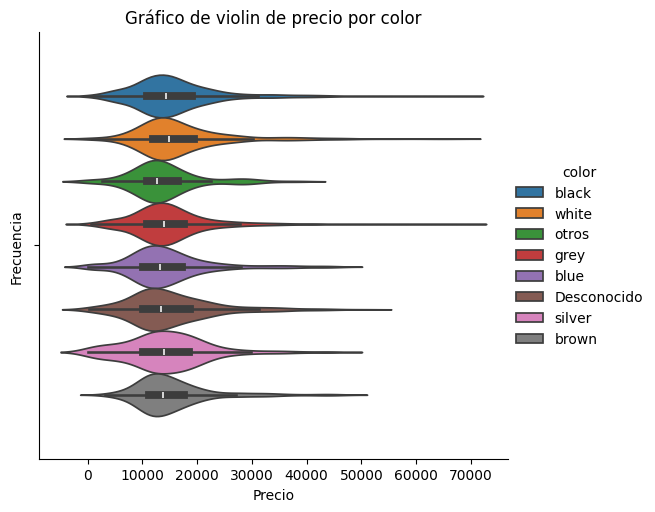

In [49]:
#Mramos si el precio depende del color, y vemos que en el grueso de vehículos no pasa
#decicimos poner una nueva categoria
sns.catplot(x = "precio", data= df_bmw3_color, kind="violin", hue="color")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [50]:
 #Es muy parecido el violin al color black, lo ponemos en ese color
df_bmw3.fillna({'color':'black'}, inplace=True)

In [51]:
del df_bmw3_color

In [52]:
df_bmw3_tipo=df_bmw3.copy()

In [53]:
df_bmw3.fillna({'tipo_coche':'sedan'}, inplace=True)

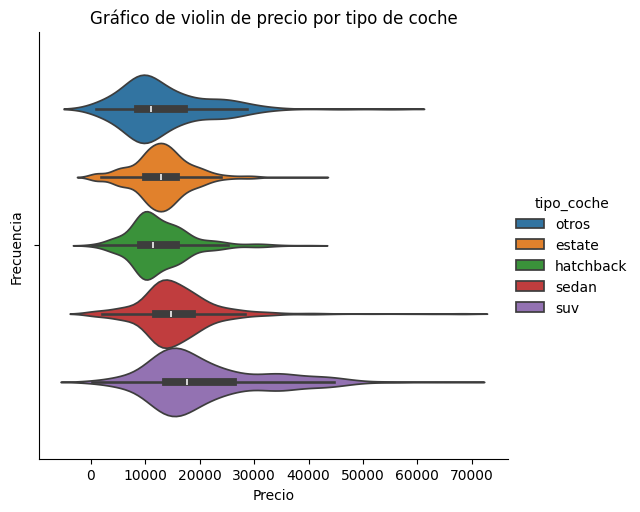

In [54]:
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "precio", data= df_bmw3_tipo, kind="violin", hue="tipo_coche")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por tipo de coche')
plt.show()


In [55]:
#El gráfico de violin es exacto a aquello que son Sedán, por lo que vamos a suponer que el grupo de coches nulos será Sedán
df_bmw3['tipo_coche'].fillna('sedan', inplace=True)

In [56]:
del df_bmw3_tipo

In [57]:
#Borramos combinatoria de 5 campos con valores nulos
df_bmw3[df_bmw3['tipo_coche'].isnull() & df_bmw3['aire_acondicionado'].isnull() & df_bmw3['asientos_traseros_plegables'].isnull() & df_bmw3['alerta_lim_velocidad'].isnull() & df_bmw3['bluetooth'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [58]:
len(df_bmw3)

4650

In [59]:
#Borramos combinatoria de columnas de 4 valores nulos
combinaciones = list(combinations(columnas_nulas, 4))
for combinacion in combinaciones:
    indices_eliminar=df_bmw3[df_bmw3[combinacion[0]].isnull() &  df_bmw3[combinacion[1]].isnull() &  df_bmw3[combinacion[2]].isnull() &  df_bmw3[combinacion[3]].isnull()].index
    df_bmw3.drop(indices_eliminar,inplace=True)

In [60]:
len(df_bmw3)

4648

In [61]:
#Borramos combinatoria de columnas de 3 valores nulos
from itertools import combinations
combinaciones = list(combinations(columnas_nulas, 3))
for combinacion in combinaciones:
    indices_eliminar=df_bmw3[df_bmw3[combinacion[0]].isnull() &  df_bmw3[combinacion[1]].isnull() &  df_bmw3[combinacion[2]].isnull()].index
    df_bmw3.drop(indices_eliminar,inplace=True)

In [62]:
len(df_bmw3)

4492

In [63]:
#volvemos a hacer recuento
df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado              367
camara_trasera                    0
asientos_traseros_plegables    3112
elevalunas_electrico              0
bluetooth                       583
gps                               0
alerta_lim_velocidad            591
precio                            0
fecha_venta                       0
dtype: int64

In [64]:
#Miramos el aire acondicionado, intuimos que puede depender del modelo de coche que tenga aire acondicionado , vamos a pasar de valores booleanos a numéricos
#dataset sin nulos
df_bmw3_ac_nonulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].notnull()]
df_bmw3_ac_nulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].isnull()]
df_bmw3_ac_nonulos["ac_int"]=0
df_bmw3_ac_nonulos = df_bmw3_ac_nonulos.reset_index()
for i in range(len(df_bmw3_ac_nonulos)):
  df_bmw3_ac_nonulos.loc[i,"ac_int"]=int(df_bmw3_ac_nonulos.loc[i,"aire_acondicionado"])
df_bmw3_ac_nulos = df_bmw3_ac_nulos.reset_index()
df_bmw3_ac_nulos["ac_int"]=2
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)


<ipython-input-64-7dc4fb82b534>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw3_ac_nonulos["ac_int"]=0


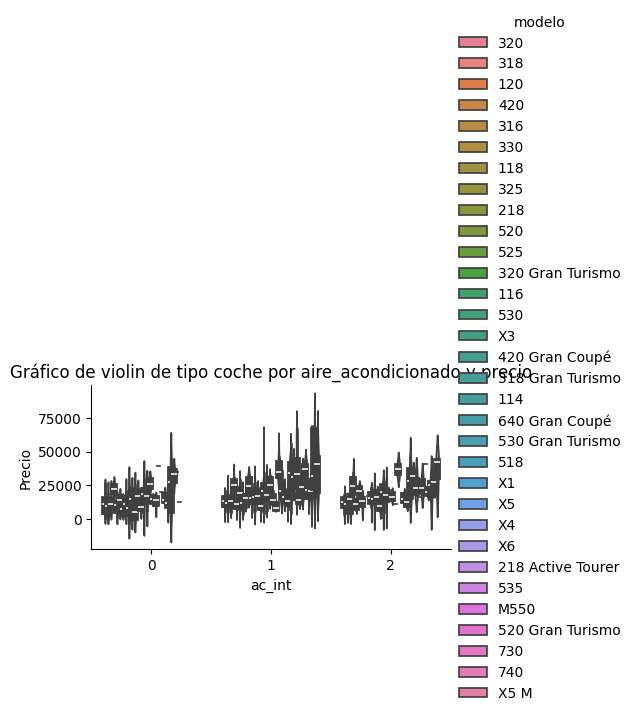

In [65]:
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "ac_int", y="precio", data= df_bmw4, kind="violin", hue="modelo")
plt.xlabel('ac_int')
plt.ylabel('Precio')
plt.title('Gráfico de violin de tipo coche por aire_acondicionado y precio')
plt.show()


In [66]:
#CONCLUSION, no se ve nada
#Vamos a calcular la moda de cada uno de los tipos de coche y asignaremos a esos tipos el valor dependiendo de ella, vemos que solo untipo de modelo suele no llevar AC
moda_ac_por_tipo = df_bmw3_ac_nonulos.groupby('modelo')['aire_acondicionado'].apply(lambda x: x.mode())
moda_ac_por_tipo

modelo              
114                0    False
116                0     True
118                0     True
120                0     True
218                0     True
218 Active Tourer  0     True
316                0     True
318                0     True
318 Gran Turismo   0     True
320                0     True
320 Gran Turismo   0     True
325                0     True
330                0     True
420                0     True
420 Gran Coupé     0     True
518                0     True
520                0     True
520 Gran Turismo   0     True
525                0     True
530                0     True
530 Gran Turismo   0     True
535                0     True
640 Gran Coupé     0     True
730                0     True
740                0     True
M550               0     True
X1                 0     True
X3                 0     True
X4                 0     True
X5                 0     True
X5 M               0     True
X6                 0     True
Name: aire_acondici

In [67]:
#descubrimos que la moda en todos los tipos de coche es que lleven aire acondicionado ponemos todos los valores nulos a 1
def ac_change(row):
  if row["modelo"] == '114':
    return 0
  else:
    return 1
df_bmw3_ac_nulos['ac_int'] = df_bmw3_ac_nulos.apply(ac_change, axis=1)
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)

In [68]:
#borramos campo aire_acondicionado y los df auxiliares
del df_bmw4['aire_acondicionado']
del df_bmw3
del df_bmw3_ac_nulos
del df_bmw3_ac_nonulos
del moda_ac_por_tipo

In [69]:
#volvemos a hacer recuento
df_bmw4.isnull().sum()

index                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
camara_trasera                    0
asientos_traseros_plegables    3112
elevalunas_electrico              0
bluetooth                       583
gps                               0
alerta_lim_velocidad            591
precio                            0
fecha_venta                       0
ac_int                            0
dtype: int64

In [70]:
#Vamos a hacer lo mismo con los asientos_traseros_plegables
df_bmw4_atp_nonulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].notnull()]
df_bmw4_atp_nulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].isnull()]
df_bmw4_atp_nonulos["atp_int"]=0
df_bmw4_atp_nonulos = df_bmw4_atp_nonulos.reset_index()
for i in range(len(df_bmw4_atp_nonulos)):
  df_bmw4_atp_nonulos.loc[i,"atp_int"]=int(df_bmw4_atp_nonulos.loc[i,"asientos_traseros_plegables"])
df_bmw4_atp_nulos = df_bmw4_atp_nulos.reset_index()
df_bmw4_atp_nulos["atp_int"]=2
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)
df_bmw5

<ipython-input-70-0707f522e2e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw4_atp_nonulos["atp_int"]=0


,level_0,index,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,ac_int,atp_int
0,6,7,325,228000.0,145.0,diesel,black,sedan,True,False,False,True,False,True,NaN,13300.0,2018-03-01,1,0
1,8,10,120,174631.0,120.0,diesel,black,otros,True,False,False,False,False,True,False,10500.0,2018-04-01,1,0
2,12,15,318,196092.0,85.0,petrol,black,otros,True,False,False,False,False,False,False,1800.0,2018-05-01,0,0
3,17,20,420,64832.0,135.0,diesel,grey,sedan,True,False,False,True,NaN,True,True,27500.0,2018-06-01,1,0
4,19,22,318,187294.0,105.0,petrol,black,otros,True,False,False,False,True,True,NaN,2400.0,2018-06-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,360,4608,X3,13412.0,100.0,diesel,black,suv,True,False,NaN,False,False,True,False,19500.0,2018-09-01,1,2
3108,361,4617,X3,126165.0,135.0,diesel,grey,suv,True,False,NaN,True,True,True,True,19800.0,2018-09-01,1,2
3109,364,4644,218 Active Tourer,35888.0,100.0,diesel,blue,otros,False,False,NaN,False,False,True,False,16200.0,2018-04-01,1,2
3110,365,4654,X3,110039.0,130.0,diesel,black,sedan,False,False,NaN,False,False,True,False,1300.0,2018-05-01,1,2


In [71]:
#Vamos a calcular la moda de cada uno de los tipos de coche (en el caso de los aseints plegables pensamos que depende más del tipo que del modelo) y asignaremos a esos tipos el valor dependiendo de ella.
moda_atp_por_tipo = df_bmw4_atp_nonulos.groupby('tipo_coche')['asientos_traseros_plegables'].apply(lambda x: x.mode())
moda_atp_por_tipo

tipo_coche   
estate      0    False
hatchback   0    False
otros       0    False
sedan       0    False
suv         0     True
Name: asientos_traseros_plegables, dtype: object

In [72]:
#En los suv la moda es True, corremos proceso para informar a True los suv y el resto a false
def atp_change(row):
  if row["tipo_coche"] == 'suv':
    return 1
  else:
    return 0
df_bmw4_atp_nulos['atp_int'] = df_bmw4_atp_nulos.apply(atp_change, axis=1)

In [73]:
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)

In [74]:
#borramos campo asientos_traseros_plegables y df axiliares
del df_bmw5['asientos_traseros_plegables']
del df_bmw4_atp_nonulos
del df_bmw4_atp_nulos
del df_bmw4

In [75]:
df_bmw5

,level_0,index,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,ac_int,atp_int
0,6,7,325,228000.0,145.0,diesel,black,sedan,True,False,True,False,True,NaN,13300.0,2018-03-01,1,0
1,8,10,120,174631.0,120.0,diesel,black,otros,True,False,False,False,True,False,10500.0,2018-04-01,1,0
2,12,15,318,196092.0,85.0,petrol,black,otros,True,False,False,False,False,False,1800.0,2018-05-01,0,0
3,17,20,420,64832.0,135.0,diesel,grey,sedan,True,False,True,NaN,True,True,27500.0,2018-06-01,1,0
4,19,22,318,187294.0,105.0,petrol,black,otros,True,False,False,True,True,NaN,2400.0,2018-06-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,360,4608,X3,13412.0,100.0,diesel,black,suv,True,False,False,False,True,False,19500.0,2018-09-01,1,1
3108,361,4617,X3,126165.0,135.0,diesel,grey,suv,True,False,True,True,True,True,19800.0,2018-09-01,1,1
3109,364,4644,218 Active Tourer,35888.0,100.0,diesel,blue,otros,False,False,False,False,True,False,16200.0,2018-04-01,1,0
3110,365,4654,X3,110039.0,130.0,diesel,black,sedan,False,False,False,False,True,False,1300.0,2018-05-01,1,0


In [76]:
#borramos la columna level_0 usadoa para reindexar
del df_bmw5['level_0']

In [77]:
#Mismo proceso bluetooth
df_bmw5_bt_nonulos=df_bmw5.loc[df_bmw5["bluetooth"].notnull()]
df_bmw5_bt_nulos=df_bmw5.loc[df_bmw5["bluetooth"].isnull()]
df_bmw5_bt_nonulos["bt_int"]=0
df_bmw5_bt_nonulos
df_bmw5_bt_nonulos = df_bmw5_bt_nonulos.reset_index()
for i in range(len(df_bmw5_bt_nonulos)):
  df_bmw5_bt_nonulos.loc[i,"bt_int"]=int(df_bmw5_bt_nonulos.loc[i,"bluetooth"])
df_bmw5_bt_nulos = df_bmw5_bt_nulos.reset_index()

<ipython-input-77-cbd7ae882d26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw5_bt_nonulos["bt_int"]=0


,level_0,index,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,ac_int,atp_int,bt_int
0,0,7,325,228000.0,145.0,diesel,black,sedan,True,False,True,False,True,NaN,13300.0,2018-03-01,1,0,0
1,1,10,120,174631.0,120.0,diesel,black,otros,True,False,False,False,True,False,10500.0,2018-04-01,1,0,0
2,2,15,318,196092.0,85.0,petrol,black,otros,True,False,False,False,False,False,1800.0,2018-05-01,0,0,0
3,4,22,318,187294.0,105.0,petrol,black,otros,True,False,False,True,True,NaN,2400.0,2018-06-01,0,0,1
4,5,24,320,194192.0,120.0,diesel,otros,otros,True,False,True,False,True,False,11800.0,2018-07-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2844,4624,X5,151522.0,190.0,diesel,black,suv,True,False,True,NaN,True,True,33000.0,2018-09-01,1,1,2
579,2851,4634,X3,97835.0,190.0,diesel,brown,sedan,True,True,False,NaN,False,True,5400.0,2018-09-01,1,0,2
580,2853,4639,X3,194966.0,110.0,diesel,grey,suv,False,True,True,NaN,True,False,4800.0,2018-09-01,1,1,2
581,2857,4649,218 Active Tourer,197276.0,112.0,diesel,white,otros,True,False,False,NaN,True,True,13100.0,2018-02-01,1,0,2


In [78]:
#El bluetooth lo vamos a hacer por modelo
moda_bt_por_tipo = df_bmw5_bt_nonulos.groupby('modelo')['bluetooth'].apply(lambda x: x.mode())
moda_bt_por_tipo

modelo              
114                0    False
116                0    False
118                0    False
120                0    False
218                0    False
218 Active Tourer  0    False
316                0    False
318                0    False
318 Gran Turismo   0    False
320                0    False
320 Gran Turismo   0    False
325                0     True
330                0    False
420                0     True
420 Gran Coupé     0    False
518                0    False
520                0    False
520 Gran Turismo   0    False
525                0    False
530                0    False
530 Gran Turismo   0    False
535                0     True
640 Gran Coupé     0    False
730                0    False
740                0    False
M550               0     True
X1                 0    False
X3                 0    False
X4                 0    False
X5                 0    False
X5 M               0    False
X6                 0    False
Name: bluetooth, dt

In [79]:
#agrupamos para saber la moda de cada uno de los modelos
moda_bt_por_tipo = df_bmw5_bt_nonulos.groupby('modelo')['bluetooth'].apply(lambda x: x.mode())
#sacamos una lista con los modelos cuya moda es que llevan bluetooth
df_moda_bt_por_tipo = pd.DataFrame(moda_bt_por_tipo)
df_moda_bt_por_tipo = moda_bt_por_tipo[df_moda_bt_por_tipo["bluetooth"]==True]
df_moda_bt_por_tipo = df_moda_bt_por_tipo.reset_index()
lista_modelos_bt = df_moda_bt_por_tipo["modelo"].tolist()
def bt_change(row):
  if row["modelo"] in lista_modelos_bt:
    return 1
  else:
    return 0

df_bmw5_bt_nulos['bt_int'] = df_bmw5_bt_nulos.apply(bt_change, axis=1)

In [80]:
#Efectivamente Ponemos todos los null a 0
df_bmw6 = pd.concat([df_bmw5_bt_nonulos,df_bmw5_bt_nulos],axis=0)

In [ ]:
#borramos campo bluetooth y df axiliares
del df_bmw6['bluetooth']
del df_bmw6['level_0']
del df_bmw5_bt_nonulos
del df_bmw5_bt_nulos
del df_moda_bt_por_tipo
del moda_bt_por_tipo
del df_bmw5

In [90]:
df_bmw6

,index,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,elevalunas_electrico,gps,alerta_lim_velocidad,precio,fecha_venta,ac_int,atp_int,bt_int
0,7,325,228000.0,145.0,diesel,black,sedan,True,False,True,True,NaN,13300.0,2018-03-01,1,0,0
1,10,120,174631.0,120.0,diesel,black,otros,True,False,False,True,False,10500.0,2018-04-01,1,0,0
2,15,318,196092.0,85.0,petrol,black,otros,True,False,False,False,False,1800.0,2018-05-01,0,0,0
3,22,318,187294.0,105.0,petrol,black,otros,True,False,False,True,NaN,2400.0,2018-06-01,0,0,1
4,24,320,194192.0,120.0,diesel,otros,otros,True,False,True,True,False,11800.0,2018-07-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4624,X5,151522.0,190.0,diesel,black,suv,True,False,True,True,True,33000.0,2018-09-01,1,1,0
579,4634,X3,97835.0,190.0,diesel,brown,sedan,True,True,False,False,True,5400.0,2018-09-01,1,0,0
580,4639,X3,194966.0,110.0,diesel,grey,suv,False,True,True,True,False,4800.0,2018-09-01,1,1,0
581,4649,218 Active Tourer,197276.0,112.0,diesel,white,otros,True,False,False,True,True,13100.0,2018-02-01,1,0,0


In [92]:
#Alerta límite e velocidad por modelo
df_bmw6_alv_nonulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].notnull()]
df_bmw6_alv_nulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].isnull()]
df_bmw6_alv_nonulos["alv_int"]=0
df_bmw6_alv_nonulos = df_bmw6_alv_nonulos.reset_index()
for i in range(len(df_bmw6_alv_nonulos)):
  df_bmw6_alv_nonulos.loc[i,"alv_int"]=int(df_bmw6_alv_nonulos.loc[i,"alerta_lim_velocidad"])
df_bmw6_alv_nulos = df_bmw6_alv_nulos.reset_index()

<ipython-input-92-c8c6ca3076bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw6_alv_nonulos["alv_int"]=0


In [102]:
#moda por modelo de alerta limite velocidad
moda_alv_por_tipo = df_bmw6_alv_nonulos.groupby('modelo')['alerta_lim_velocidad'].apply(lambda x: x.mode())
#sacamos una lista con los modelos cuya moda es que llevan bluetooth
df_moda_alv_por_tipo = pd.DataFrame(moda_alv_por_tipo)
df_moda_alv_por_tipo = moda_alv_por_tipo[df_moda_alv_por_tipo["alerta_lim_velocidad"]==True]
df_moda_alv_por_tipo = df_moda_alv_por_tipo.reset_index()
lista_modelos_alv = df_moda_alv_por_tipo["modelo"].tolist()
lista_modelos_alv

['218',
 '218 Active Tourer',
 '320',
 '320 Gran Turismo',
 '330',
 '420',
 '420 Gran Coupé',
 '518',
 '520',
 '520 Gran Turismo',
 '525',
 '530',
 '530 Gran Turismo',
 '535',
 '640 Gran Coupé',
 '730',
 '740',
 'M550',
 'X3',
 'X4',
 'X5',
 'X5 M',
 'X6']

In [103]:
def alv_change(row):
  if row["modelo"] in lista_modelos_alv:
    return 1
  else:
    return 0

df_bmw6_alv_nulos['alv_int'] = df_bmw6_alv_nulos.apply(alv_change, axis=1)

In [104]:
#volvemos a hacer recuento
#Efectivamente Ponemos todos los null a 0
df_bmw7 = pd.concat([df_bmw6_alv_nonulos,df_bmw6_alv_nulos],axis=0)

level_0                   0
index                     0
modelo                    0
km                        0
potencia                  0
tipo_gasolina             0
color                     0
tipo_coche                0
volante_regulable         0
camara_trasera            0
elevalunas_electrico      0
gps                       0
alerta_lim_velocidad    591
precio                    0
fecha_venta               0
ac_int                    0
atp_int                   0
bt_int                    0
alv_int                   0
dtype: int64

In [110]:
#borramos campo bluetooth y df axiliares
del df_bmw7['alerta_lim_velocidad']
del df_bmw7['level_0']
del df_bmw6_alv_nonulos
del df_bmw6_alv_nulos
del df_moda_alv_por_tipo
del moda_alv_por_tipo
del df_bmw6

In [112]:
df_bmw7.isnull().sum()

index                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
camara_trasera          0
elevalunas_electrico    0
gps                     0
precio                  0
fecha_venta             0
ac_int                  0
atp_int                 0
bt_int                  0
alv_int                 0
dtype: int64